In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Import data from file

In [2]:
df = pd.read_csv('CollegeScorecard/CS_subset.csv', encoding = 'ISO-8859-1')

## Exploring Dataset

In [3]:
pd.set_option('display.max_columns', 50)
df

,INSTNM,CITY,STABBR,PREDDEG,CONTROL,LOCALE,SATVRMID,SATMTMID,SATWRMID,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,NPT4_PUB,NPT4_PRIV,PCTPELL,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25abv,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,md_earn_wne_p10,gt_25k_p6
0,Alabama A & M University,Normal,AL,3,1,12.0,410.0,400.0,NaN,17.0,17.0,17.0,NaN,823.0,0.0,4051.0,0.0279,0.9501,0.0089,0.0022,0.0012,0.0010,0.0000,0.0002,0.0084,0.0622,13415.0,NaN,0.7115,0.6314,NaN,0.5000,NaN,0.8204,0.1049,33611.5,373.1565536,0.44471387,0.308718313,NaN,31400,0.462298036
1,University of Alabama at Birmingham,Birmingham,AL,3,1,12.0,580.0,585.0,NaN,25.0,26.0,23.0,NaN,1146.0,0.0,11200.0,0.5987,0.2590,0.0258,0.0518,0.0026,0.0007,0.0344,0.0140,0.0130,0.2579,14805.0,NaN,0.3505,0.8016,NaN,0.5000,NaN,0.5397,0.2422,23117,256.6460899,0.756266667,0.508549808,NaN,40300,0.660484493
2,Amridge University,Montgomery,AL,3,2,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,322.0,0.2919,0.4224,0.0093,0.0031,0.0031,0.0031,0.0000,0.0000,0.2671,0.3727,NaN,7455.0,0.6839,0.3750,NaN,0.3333,NaN,0.7629,0.8540,PrivacySuppressed,PrivacySuppressed,0.647249191,PrivacySuppressed,NaN,38100,0.646666646
3,University of Alabama in Huntsville,Huntsville,AL,3,1,12.0,575.0,580.0,NaN,26.0,26.0,25.0,NaN,1180.0,0.0,5525.0,0.7012,0.1310,0.0338,0.0364,0.0145,0.0002,0.0161,0.0329,0.0338,0.2395,17520.0,NaN,0.3281,0.8098,NaN,0.4444,NaN,0.4728,0.2640,24738,274.6425129,0.781997919,0.478211346,NaN,46600,0.660565734
4,Alabama State University,Montgomery,AL,3,1,12.0,430.0,425.0,NaN,17.0,17.0,17.0,NaN,830.0,0.0,5354.0,0.0161,0.9285,0.0114,0.0015,0.0009,0.0007,0.0064,0.0207,0.0138,0.0902,11936.0,NaN,0.8265,0.6219,NaN,0.3023,NaN,0.8735,0.1270,33452,371.3857766,0.331198862,0.257481955,NaN,27800,0.342225611
5,The University of Alabama,Tuscaloosa,AL,3,1,13.0,555.0,570.0,540.0,26.0,27.0,25.0,7.0,1171.0,0.0,28692.0,0.7865,0.1140,0.0313,0.0112,0.0044,0.0011,0.0210,0.0278,0.0028,0.0852,20916.0,NaN,0.2107,0.8700,NaN,0.6563,NaN,0.4148,0.0853,24000,266.4492,0.8139413,0.666009354,NaN,42400,0.661085427
6,Central Alabama Community College,Alexander City,AL,2,1,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1779.0,0.6785,0.2945,0.0118,0.0022,0.0022,0.0011,0.0006,0.0011,0.0079,0.4660,6407.0,NaN,0.6515,NaN,0.4267,NaN,0.4159,0.4777,0.3153,PrivacySuppressed,PrivacySuppressed,0.438401776,NaN,0.289189362,27100,0.446135819
7,Athens State University,Athens,AL,3,1,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2999.0,0.7513,0.1064,0.0213,0.0047,0.0190,0.0007,0.0133,0.0070,0.0764,0.5502,NaN,NaN,0.4107,NaN,NaN,NaN,NaN,0.6277,0.6410,18832,209.0738056,0.767649075,NaN,NaN,39700,0.652219892
8,Auburn University at Montgomery,Montgomery,AL,3,1,12.0,NaN,NaN,NaN,21.0,21.0,20.0,NaN,970.0,0.0,4322.0,0.5532,0.3031,0.0079,0.0245,0.0037,0.0000,0.0000,0.0435,0.0641,0.3061,11915.0,NaN,0.4006,0.6321,NaN,0.4545,NaN,0.6476,0.2938,21791,241.9247716,0.628856194,0.285309228,NaN,34800,0.554537117
9,Auburn University,Auburn University,AL,3,1,13.0,570.0,595.0,565.0,27.0,28.0,26.0,7.0,1215.0,0.0,19761.0,0.8543,0.0714,0.0253,0.0213,0.0077,0.0000,0.0000,0.0074,0.0127,0.0902,17541.0,NaN,0.1687,0.8946,NaN,0.8529,NaN,0.3610,0.0415,22250,247.0206125,0.882455377,0.680930242,NaN,45400,0.709142148


In [4]:
df["PREDDEG"] = df["PREDDEG"].astype('category')
df["CITY"] = df["CITY"].astype('category')
df["STABBR"] = df["STABBR"].astype('category')
df["CONTROL"] = df["CONTROL"].astype('category')
df["LOCALE"] = df["LOCALE"].astype('category')

In [5]:
df = df.replace('PrivacySuppressed', np.nan)
df["gt_25k_p6"] = df["gt_25k_p6"].astype('float64')
df["md_earn_wne_p10"] = df["md_earn_wne_p10"].astype('float64')

df["gt_25k_05_p6"] = np.where(df["gt_25k_p6"]>0.5, 1, np.where(np.isnan(df["gt_25k_p6"]), np.nan, 0))
df["gt_25k_05_p6"]

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
5       1.0
6       0.0
7       1.0
8       1.0
9       1.0
10      1.0
11      0.0
12      0.0
13      1.0
14      0.0
15      0.0
16      1.0
17      0.0
18      NaN
19      0.0
20      1.0
21      0.0
22      1.0
23      1.0
24      NaN
25      0.0
26      1.0
27      0.0
28      0.0
29      0.0
       ... 
7774    NaN
7775    NaN
7776    NaN
7777    NaN
7778    NaN
7779    NaN
7780    NaN
7781    NaN
7782    NaN
7783    NaN
7784    NaN
7785    NaN
7786    NaN
7787    NaN
7788    NaN
7789    NaN
7790    NaN
7791    NaN
7792    NaN
7793    NaN
7794    NaN
7795    NaN
7796    NaN
7797    NaN
7798    NaN
7799    NaN
7800    NaN
7801    NaN
7802    NaN
7803    NaN
Name: gt_25k_05_p6, Length: 7804, dtype: float64

In [6]:
import sklearn.utils
df_shuff = sklearn.utils.shuffle(df)

In [7]:
print(df_shuff.shape)
print(df_shuff.head(int(0.8*7804)).shape)
print(df_shuff.tail(int(0.2*7804 +1)).shape)

train = df_shuff.head(int(0.8*7804))
test = df_shuff.head(int(0.2*7804 + 1))

train.to_csv("./train.csv", index=False)
test.to_csv("./test.csv", index=False)

(7804, 43)
(6243, 43)
(1561, 43)


In [8]:
df2 = pd.read_csv('./train.csv')
df2["PREDDEG"] = df2["PREDDEG"].astype('category')
df2["CITY"] = df2["CITY"].astype('category')
df2["STABBR"] = df2["STABBR"].astype('category')
df2["CONTROL"] = df2["CONTROL"].astype('category')
df2["LOCALE"] = df2["LOCALE"].astype('category')

In [9]:
df2_corr = df2.corr()

df2_corr["md_earn_wne_p10"].sort_values()

df2_subcorr = df2[["PCTPELL", "C200_L4_POOLED_SUPP", "UGDS_HISP", "UG25abv", "RET_PTL4", "SATWRMID", "ACTCMMID", "SAT_AVG", "SATMTMID", "ACTMTMID"]].corr()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204423A9160>,
      dtype=object)

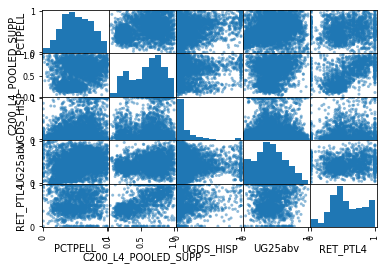

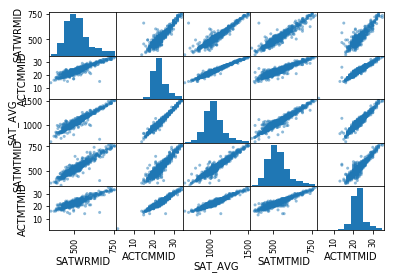

In [10]:
pd.plotting.scatter_matrix(df2[["PCTPELL", "C200_L4_POOLED_SUPP", "UGDS_HISP", "UG25abv", "RET_PTL4"]])
pd.plotting.scatter_matrix(df2[["SATWRMID", "ACTCMMID", "SAT_AVG", "SATMTMID", "ACTMTMID"]])

In [12]:
df2["md_earn_wne_p10"].describe()

count      4515.000000
mean      33191.849391
std       13858.776445
min        8400.000000
25%       24350.000000
50%       31200.000000
75%       39050.000000
max      250000.000000
Name: md_earn_wne_p10, dtype: float64